In [246]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [247]:
df=pd.read_csv("averages.csv")
df[["term"]]=pd.Categorical(df.term)
df.head()

ccode      instructor  organization  expl_lvl  q_treatment    visual  \
0  ACTSC 231     Anne Mackay      1.600000  2.873239     1.536232  1.591549   
1  ACTSC 231  Carole Bernard      1.727273  2.909091     2.090909  1.700000   
2  ACTSC 232    James Adcock      1.360825  2.804124     1.453608  1.567010   
3  ACTSC 331       Rocky Cui      1.851064  2.744681     2.043478  1.978723   
4  ACTSC 371  Brent Matheson      2.221053  2.821053     2.000000  2.452632   

       oral      help  interesting   overall  attendance  assign_helpful  \
0  1.676056  2.408451     1.776119  1.647887    1.225352        1.588235   
1  2.000000  2.272727     1.700000  1.818182    1.000000        1.300000   
2  1.268041  3.690722     1.641304  1.391753    1.154639        1.604167   
3  2.108696  2.851064     1.866667  1.936170    1.297872        1.500000   
4  2.242105  3.505263     2.070588  2.333333    1.329787        1.741935   

   printed_notes  textbook  new_material  assign_amount  hours_outside  \
0       1.358209  2.036364      2.782609       2.901639       2.279412   
1       1.625000  1.333333      2.545455       2.818182       2.000000   
2       1.516129  1.865169      2.659794       2.927835       2.000000   
3       1.586207  1.878049      2.659574       2.755556       2.021277   
4       1.909091  2.271429      2.851064       3.021277       1.903226   

   num_responses  term  
0             71  1131  
1             11  1131  
2             97  1131  
3             47  1131  
4             95  1131

In [248]:
df1=df[df.num_responses>10] # only surveys with >10 responses
df1=df1.groupby("instructor").filter(lambda x:len(x)>2) # only teachers with >=3 classes
df1.head()

ccode      instructor  organization  expl_lvl  q_treatment  \
2              ACTSC 232    James Adcock      1.360825  2.804124     1.453608   
4              ACTSC 371  Brent Matheson      2.221053  2.821053     2.000000   
6              ACTSC 372      Peter Wood      1.435644  2.623762     1.400000   
7  ACTSC 433 / ACTSC 833         Jun Cai      1.723077  2.859375     2.262295   
8  ACTSC 446 / ACTSC 846      Ruodo Wang      2.308411  2.557692     1.990566   

     visual      oral      help  interesting   overall  attendance  \
2  1.567010  1.268041  3.690722     1.641304  1.391753    1.154639   
4  2.452632  2.242105  3.505263     2.070588  2.333333    1.329787   
6  1.574257  1.386139  3.198020     1.590000  1.455446    1.227723   
7  1.923077  2.476923  4.092308     1.833333  1.984375    1.138462   
8  2.644860  2.679245  3.735849     2.031250  2.262136    1.457944   

   assign_helpful  printed_notes  textbook  new_material  assign_amount  \
2        1.604167       1.516129  1.865169      2.659794       2.927835   
4        1.741935       1.909091  2.271429      2.851064       3.021277   
6        1.666667       1.785714  2.103896      2.762376       2.891089   
7        1.415385       1.578947  2.166667      2.907692       2.707692   
8        1.775701       1.819444  2.370968      2.538462       2.844660   

   hours_outside  num_responses  term  
2       2.000000             97  1131  
4       1.903226             95  1131  
6       1.930000            101  1131  
7       1.968750             65  1131  
8       2.038095            107  1131

<ipython-input-303-4608955f3465>:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df1.hist(ax=plt.figure(figsize = (15,20)).gca());


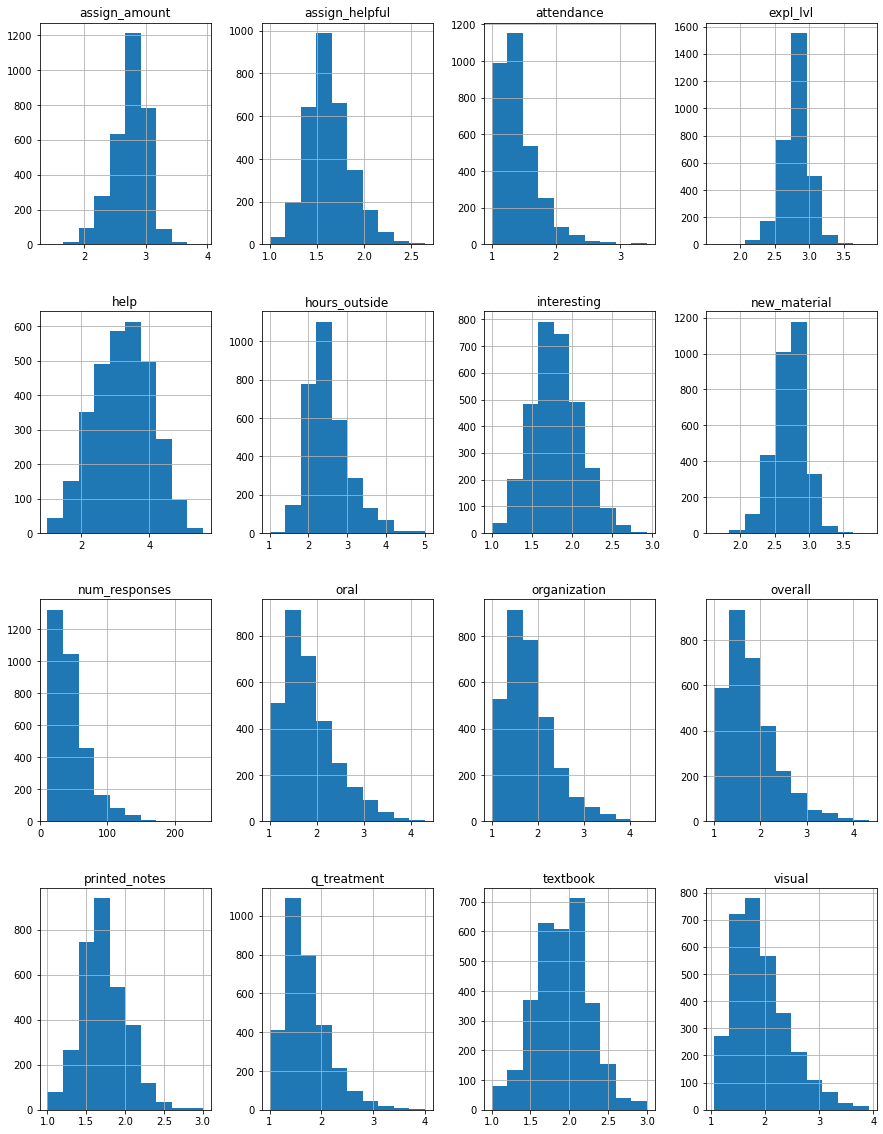

In [303]:
df1.hist(ax=plt.figure(figsize = (15,20)).gca());

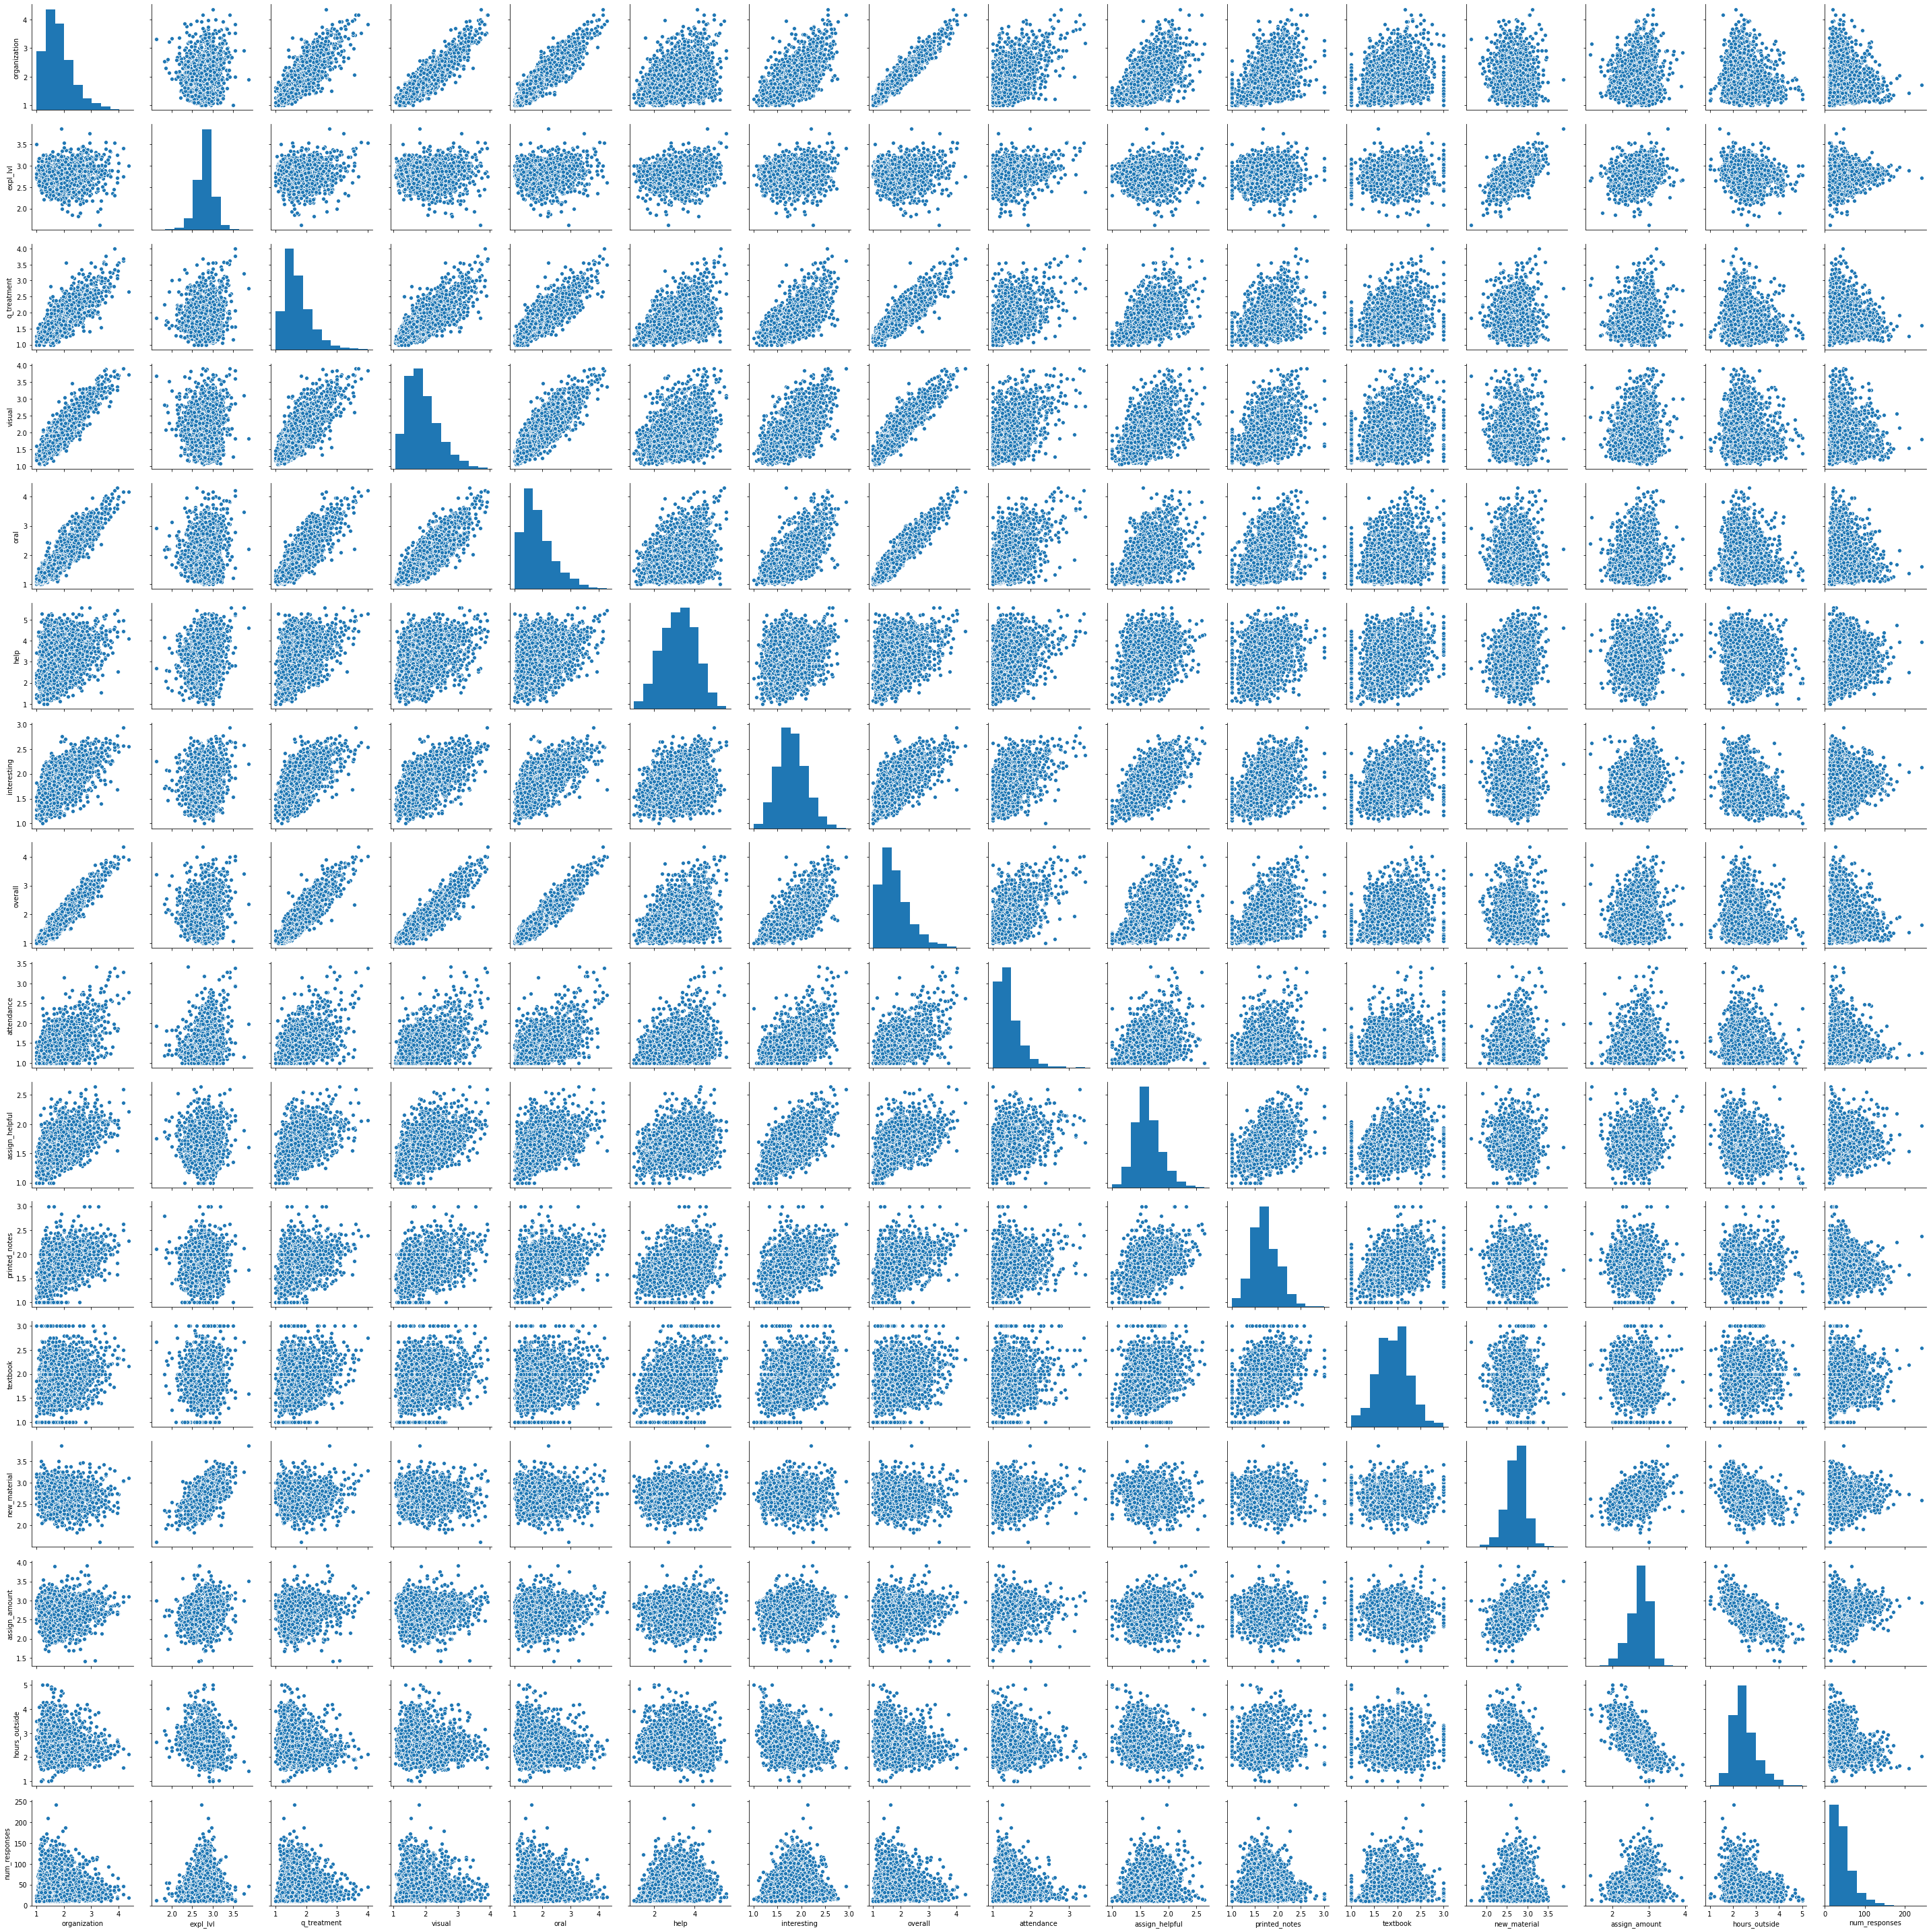

In [312]:
sns.pairplot(df1.drop("term",1)); # lol unreadable

In [305]:
df1["dept"]=df1.ccode.apply(lambda x:x.split(" ",1)[0])

In [306]:
df1.dept.value_counts()

CS        1247
MATH       696
STAT       436
ACTSC      200
AMATH      169
CO         158
PMATH       91
COMM        42
CM          27
MATBUS      24
MTHEL       14
SE          13
ACC          3
Name: dept, dtype: int64

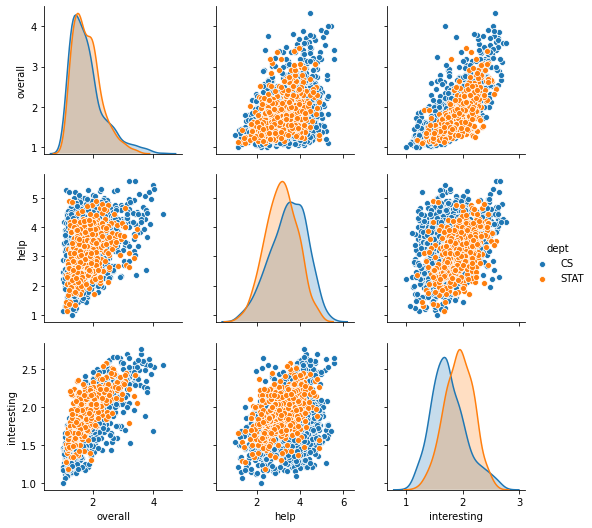

In [307]:
depts=["CS","STAT"]#,"ACTSC","MATH","AMATH","CO","PMATH"]
sns.pairplot(df1[df1.dept.isin(depts)],
             vars=["overall","help","interesting"],hue="dept");

In [277]:
sal=pd.concat([pd.read_csv(f"salaries/p_{yr}.csv") for yr in range(2018,2010,-1)])
sal=sal.groupby("name").first()
sal.head(50)

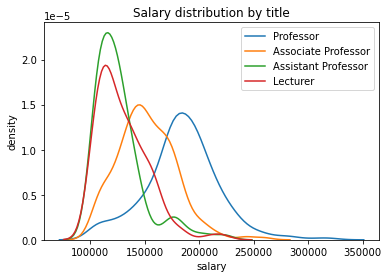

In [332]:
for tit in sal.title.unique():
    sns.kdeplot(sal[sal.title==tit].salary,label=tit)
plt.legend();

plt.xlabel('salary')
plt.ylabel('density')
plt.title('Salary distribution by title');
# plt.savefig("sal_dist.png")

In [296]:
sal.loc["David Jao"]

title       Professor
salary         141649
benefits       447.56
Name: David Jao, dtype: object

In [297]:
sal.sort_values("salary",ascending=False).head(50) # rich profs

title     salary  benefits
name                                                              
Raymond Laflamme                    Professor  322455.36    780.76
Thomas Scott                        Professor  316407.53    627.64
Ken Tan                             Professor  310591.52    234.76
David Cory                          Professor  298323.32    314.20
George Dixon                        Professor  285000.06   3600.00
Kenneth Klassen                     Professor  283675.32    611.56
Alan Webb                           Professor  282151.52    596.68
Sushanta Mitra                      Professor  279093.18    514.64
David Edwards                       Professor  274601.76    332.16
Lyndon Jones                        Professor  269662.20    609.96
Kevin Resch                         Professor  264966.32    551.84
Terrance Mcmahon                    Professor  261987.20      6.83
Alan Douglas              Associate Professor  259757.20    243.16
Theophanis Stratopoulos   Associate Professor  258796.36    527.84
Sarah Gunz                          Professor  257577.72    262.60
Ian Orchard                         Professor  256689.24   5367.34
Claudio Canizares                   Professor  256610.24    629.36
Philippe Van Cappellen              Professor  254869.98    667.24
Stanley Woo                         Professor  254118.04    706.08
Catherine Rosenberg                 Professor  251072.44    696.96
Safieddin Safavi-Naeini             Professor  251021.68    265.28
Colin Macleod                       Professor  248071.68    294.76
Neil Brisley              Associate Professor  245037.78    538.76
Jefim Boritz                        Professor  244891.64    246.52
Michele Mosca                       Professor  243317.03    236.44
J Ian Munro                         Professor  242904.12      6.83
Tony Wirjanto                       Professor  242632.16    268.96
Tom Coleman                         Professor  242535.36    306.84
Ranjini Jha               Associate Professor  241860.04    258.40
Frederick Ravenhill                 Professor  240831.04    264.52
Tamer Ozsu                          Professor  240754.88    291.60
Blake Phillips            Associate Professor  240383.36    517.64
Linda Nazar                         Professor  239498.43    279.12
Roy Brouwer                         Professor  238228.18    585.12
Raafat Mansour                      Professor  236366.92    653.56
Nancy Waite                         Professor  236051.64    680.72
Catherine Burns                     Professor  234429.68    243.36
Vern Paulsen                        Professor  233769.64    269.76
Richard Cook                        Professor  233555.80    272.68
Marlee Spafford                     Professor  233429.00    276.32
Amir Khajepour                      Professor  232812.52    588.36
David Welch                         Professor  232467.94    600.24
Ian Goulden                         Professor  232397.28    686.60
Neil Thomson                        Professor  232148.52    685.08
Ming Li                             Professor  230360.04    635.84
Manoj Sachdev                       Professor  229776.32    678.36
Navaratnam Namachchivaya            Professor  229566.64    674.96
John Mcphee                         Professor  228935.04    624.48
Jimmy Lin                           Professor  228511.32    270.04
Amir Khandani                       Professor  228388.64    611.52

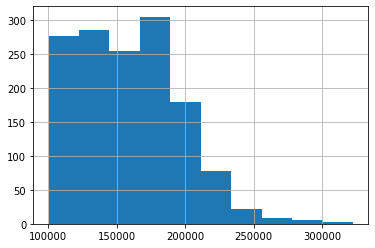

In [298]:
sal.salary.hist();

In [289]:
sal.title.value_counts()

Professor              589
Associate Professor    464
Assistant Professor    195
Lecturer               171
Name: title, dtype: int64

In [302]:
df11=df1.groupby("instructor")[["overall"]].mean().sort_values(ascending=True,by="overall").reset_index()

salj=pd.merge(df11,sal,how='left', left_on=["instructor"],right_on=['name'])
salj[salj.isna().any(axis=1)]#[0:50]

instructor   overall title  salary  benefits
1         Ryan Trelford  1.142239   NaN     NaN       NaN
9       Jordan Hamilton  1.211254   NaN     NaN       NaN
24         Blake Madill  1.297009   NaN     NaN       NaN
26               Xi Gao  1.300078   NaN     NaN       NaN
33   Michelle Ashburner  1.322350   NaN     NaN       NaN
..                  ...       ...   ...     ...       ...
344        Maite Dupuis  3.017096   NaN     NaN       NaN
345       Ahmad Alrefai  3.225774   NaN     NaN       NaN
347   Daniela Maftuleac  3.326026   NaN     NaN       NaN
348        Steven Gindi  3.395768   NaN     NaN       NaN
351       Iakov Nekrich  3.560606   NaN     NaN       NaN

[128 rows x 5 columns]